# DATA 4319: Statistical and Machine Learning
Much of the content in this lecture is also available from the online companion to a course on machine learning offered at [Caltech](https://work.caltech.edu/telecourse)

## Lecture 1: History, Formalization, and the Perceptron


Machine learning is about making computers modify or adapt their actions so that these actions get more accurate, where accuracy is measured by how well the chosen actions reflect the correct one. In recent years, machine learning has seen an explosion of interest from both academia and industry, though it should be noted that the concept of machine learning has been around since the 1950's. 


![Nvidia Machine Learning Historical Chart](nvidia_picture.png)


### The Components of Learning (by example)
Banks recieve thousands of credit car applications every day; and so, automation is desired. Further, **no magic formula** exists which can always predict whether or not a costumer will default. This lack of magic formula (it really cannot ever be known) implies that we use historical records (DATA) of previous customers to estimate a *good* formula for credit approval. For this machine learning problem, we will have the following components. 

* $x$: Input customer information that is used to make credit decision.
* $f:\mathcal{X} \rightarrow \mathcal{Y}$: *Unknown target* function that is the ideal formula for credit approval. 
* $\mathcal{X}$: *Input space* consisting of all possible input $x$.
* $\mathcal{Y}$: *Output space* consisting of no or yes credit approval.
* $\mathcal{D}$: *Data set* of input-output examples of the form $(x_1, y_1), \dots, (x_N, y_N)$, where $f(x_i) = y_i$ for all $i=1,\dots, N$.
* $\mathcal{A}$: Learning algorithm which uses $D$ to pick a formula (hypothesis) $g:\mathcal{X}\rightarrow \mathcal{Y}$ so that $g\approx f$, where $g\in \mathcal{H}$. Here $\mathcal{H}$ is the *hypothesis space*. 

The following image illustrates the interaction between these components.

![Basic Learning Problem Setup](Learning_Model_One.png)


**Definition.** The hypothesis set and the learning algorithm are called the *learning model*. 

## A Simple Learning Model: The Perceptron (classical version)
Let $\mathcal{X} = \mathbb{R}^d$ be the input space, and let $\mathcal{Y} = \{-1, 1\}$ be the output space. For our credit example:

$$
x = (\text{salary, years in residence, outstanding debt,}\dots, \text{other related data})
$$

$$
y = \text{approving or denying credit}
$$

For $h \in \mathcal{H}$, $h(x)$ gives different weights to the different coordinates of $x$. This reflects the relative importance of each coordinate to the credit decision. The combined weighted coordinates form a credit score which is compared to some threshold, say $theta$. 

* Approve if
$$
\sum_{i=1}^{d}w_ix_i > \theta
$$

* Deny if
$$
\sum_{i=1}^{d}w_ix_i < \theta
$$

We next introduce a *bias* $- b = \theta$, and so, we build the following form for hypothesis functions in $\mathcal{H}$.

$$
h(x) = \text{sign}\Big((\sum_{i=1}^{d}w_ix_i) + b\Big), 
$$

where $h(x) = 1$ means approve and $h(x) = -1 $ means deny. 

We next simplify notation by treating the bias $b$ as a weight, and modify $x$ so that 

$$
w = [b, w_1, \dots, w_d]^{T}
$$

$$
x = [1.0, x_1, \dots, x_d]^{T}
$$

Thus, $\mathcal{X} = {1.0}\times\mathbb{R}^d$, and $h(x) = \text{sign}(w^{T}x)$. 

### Perceptron Learning Algorithm (PLA)
This is an iterative method. Suppose an example from $(x_1,y_1), \dots, (x_N, y_N)$ is currently misclassifed at time $t$, and denote this misclassifed example by $(x(t), y(t))$. Note that since $(x(t), y(t))$ is currently misclassifed, 

$$
y(t) \neq \text{sign}(w^{T}(t)x(t)). 
$$

**Update Rule:**

$$
w(t+1) = w(t) + y(t)x(t).
$$

**Theorem.** The perceptron model will always classify the training examples correctly when the data is linearly seperable. 

## Julia Programming: The Perceptron Learning Model (Classical Version)
We will now use the Julia programming language to implement the perceptron learning model. We will classify data from the [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Our task is to predict the species of flower based off of measurements of sepeal length and width. This task is often referred to as the ''Hello World'' of machine learning.

You will need to add the following packages:
 * CSV [documentation](https://juliadata.github.io/CSV.jl/stable/)
 * Plots [documentation](http://docs.juliaplots.org/latest/)


In [1]:
using CSV, Plots
theme(:dark)
""" Provided you have a saved and valid .csv file in your current working directory, you may 
    load this file as a Dataframe using the following syntax. 
"""
iris = CSV.read("iris_data.csv")
iris = iris[1:100,1:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [4]:
# We will only use the sepal length and width for our analysis 
data = [x for x in zip(iris[1], iris[3], iris[5])]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


100-element Array{Tuple{Float64,Float64,String},1}:
 (5.1, 1.4, "setosa")    
 (4.9, 1.4, "setosa")    
 (4.7, 1.3, "setosa")    
 (4.6, 1.5, "setosa")    
 (5.0, 1.4, "setosa")    
 (5.4, 1.7, "setosa")    
 (4.6, 1.4, "setosa")    
 (5.0, 1.5, "setosa")    
 (4.4, 1.4, "setosa")    
 (4.9, 1.5, "setosa")    
 (5.4, 1.5, "setosa")    
 (4.8, 1.6, "setosa")    
 (4.8, 1.4, "setosa")    
 ⋮                       
 (5.6, 4.1, "versicolor")
 (5.5, 4.0, "versicolor")
 (5.5, 4.4, "versicolor")
 (6.1, 4.6, "versicolor")
 (5.8, 4.0, "versicolor")
 (5.0, 3.3, "versicolor")
 (5.6, 4.2, "versicolor")
 (5.7, 4.2, "versicolor")
 (5.7, 4.2, "versicolor")
 (6.2, 4.3, "versicolor")
 (5.1, 3.0, "versicolor")
 (5.7, 4.1, "versicolor")

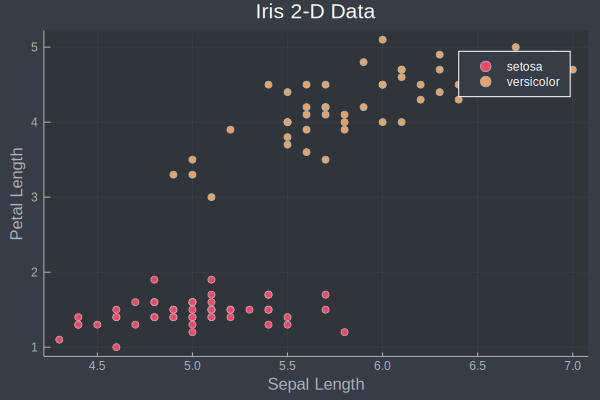

In [5]:
scatter([x[1:2] for x in data if x[3] == "setosa"],label = "setosa")
scatter!([x[1:2] for x in data if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", 
      xlabel = "Sepal Length", 
      ylabel = "Petal Length")

Notice that our data is linearly separable. This is very important since the perceptron model performs poorly when learning on non-linearly seperable data. This will be seen in the homework.  

In [6]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in data], [x[3] == "setosa" ? 1 : -1 for x in data]

(Array{Float64,1}[[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], [4.6, 1.5], [5.0, 1.4], [5.4, 1.7], [4.6, 1.4], [5.0, 1.5], [4.4, 1.4], [4.9, 1.5]  …  [5.5, 4.4], [6.1, 4.6], [5.8, 4.0], [5.0, 3.3], [5.6, 4.2], [5.7, 4.2], [5.7, 4.2], [6.2, 4.3], [5.1, 3.0], [5.7, 4.1]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
# Assign random weights
w = randn(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

# Perceptron Learning Algorithm 
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA (generic function with 1 method)

In [8]:
#Iterate the PLA by randomly testing entries in the dataset. This 
# is equivalent to what we will learn to be stochastic gradient descent.
for _ = 1:70000
    # Choose random entries to update (if possible)
    j = rand(1:100)
    w = PLA(w, X[j], Y[j])
end

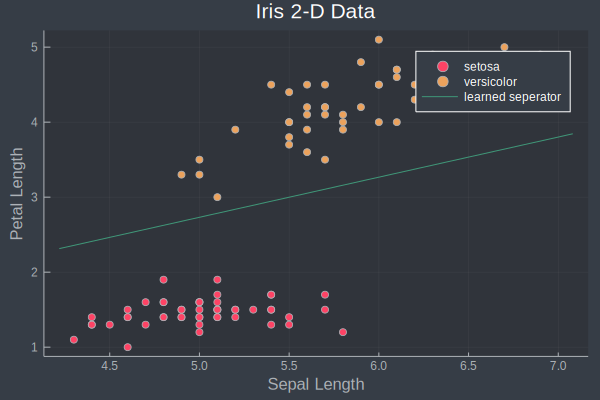

In [9]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "learned seperator")

Notice that our updating of the weights almost has split the datasets! Maybe we should continue to randomly update...

In [ ]:
w

In [ ]:
x_test = [5.1, 3.5]

In [8]:
function predict(w, x)
    return h(w, x) == 1 ? "setosa" : "versicolor"
end

predict (generic function with 1 method)

In [12]:
data[78]

(6.7, 3.0, "versicolor")

In [21]:
predict(w, X[20])

"setosa"

In [14]:
w

3-element Array{Float64,1}:
  98.57024009253624
 -61.09234367752367
  76.96987779845526